# Introduction

**Civil engineering** is a professional engineering discipline that deals with the design, construction, and maintenance of the physical and naturally built environment, including public works such as roads, bridges, canals, dams, airports, sewerage systems, pipelines, structural components of buildings, and railways.

**Concrete** is the most important material in civil engineering. The concrete
compressive strength is a highly nonlinear function of age and ingredients.
These ingredients include cement, blast furnace slag, fly ash, water,
superplasticizer, coarse aggregate, and fine aggregate.

Our objective is to build a machine learning model that would help Civil Engineers to estimate the compressive strength of the concrete so that they can further take a decision whether the concrete should be used in their current project or not.

# About the Data

The data has 8 quantitative input variables, and 1 quantitative output
variable, and 1030 instances

**Features** **:**


* Cement : measured in kg in a m3 mixture
* Blast : measured in kg in a m3 mixture
* Fly ash : measured in kg in a m3 mixture
* Water : measured in kg in a m3 mixture
* Superplasticizer : measured in kg in a m3 mixture
* Coarse Aggregate : measured in kg in a m3 mixture
* Fine Aggregate : measured in kg in a m3 mixture
* Age : day (1~365)


**Target :**

* Concrete compressive strength measured in MPa









# Importing Libraries

In [1]:
# For Exploratory Data Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

# For Data Preprocessing

from sklearn.model_selection import train_test_split

# For Model Building

from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score, ShuffleSplit , GridSearchCV 

# For Evaluation

from sklearn.metrics import r2_score, mean_squared_error

# Warnings

import warnings
warnings.filterwarnings("ignore")

# Loading the Data

In [2]:
df = pd.read_csv("/content/data.csv")

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.shape

(1030, 9)

There are 1030 rows and 9 columns

In [5]:
df.columns.tolist()

['Cement (component 1)(kg in a m^3 mixture)',
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
 'Fly Ash (component 3)(kg in a m^3 mixture)',
 'Water  (component 4)(kg in a m^3 mixture)',
 'Superplasticizer (component 5)(kg in a m^3 mixture)',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
 'Age (day)',
 'Concrete compressive strength(MPa, megapascals) ']

Changing column names for easy usage. 

In [6]:
df.rename(columns = {'Cement (component 1)(kg in a m^3 mixture)' : 'cement',
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)' : 'slag',
 'Fly Ash (component 3)(kg in a m^3 mixture)' : 'ash',
 'Water  (component 4)(kg in a m^3 mixture)' : 'water', 
 'Superplasticizer (component 5)(kg in a m^3 mixture)' : 'superplastic',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)' : 'coarseagg',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)' : 'fineagg',
 'Age (day)' : 'age',
 'Concrete compressive strength(MPa, megapascals) ' : 'strength'},inplace=True)

In [7]:
df.head(2)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


All the features are numeric and there are no null values in any column


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


**Observations** :
- Slag, ash and age has wide difference in mean and 50% values,indicating mean > median, so being a right tailed skewness in data.
- Considering the difference b/w ( Q1,median ) and (Q3 and median) in columns slag,ash there are huge number of outliers.
- Other columns has very little diff b/w ( Q1,median ) and (Q3 and median), so there might be 1 or 2 outliers

# Data Cleaning

In [10]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [11]:
df.duplicated().sum()

25

Dropping the duplicate values

In [12]:
df = df.drop_duplicates()

# Feature Engineering

**Creating new features out of existing columns :**

* Creating column **totalagg** combining Fine Aggregate and Coarse Aggregate
* Creating column **w/c_ratio** dividing water content by cement content
- Creating column **w/b_ratio** dividing water content by binder content ( Binder = Cement + Fly Ash + Slag )
- Creating column **concrete** combining weights of all ingredients
 to get total weight of concrete






In [13]:
df["totalagg"] = (df['fineagg'] + df['coarseagg'])
df['w/c_ratio'] = (df['water'] / df['cement'])
df['w/b_ratio'] = (df['water']) / ( df['cement'] + df['ash'] + df['slag'])
df['concrete'] = df['cement'] + df['fineagg'] + df['coarseagg'] + df['water'] + df['superplastic'] + df['ash'] + df['slag'] 

# Exploratory Data Analysis

In [14]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength', 'totalagg', 'w/c_ratio', 'w/b_ratio',
       'concrete'],
      dtype='object')

**Looking at distribution of columns**

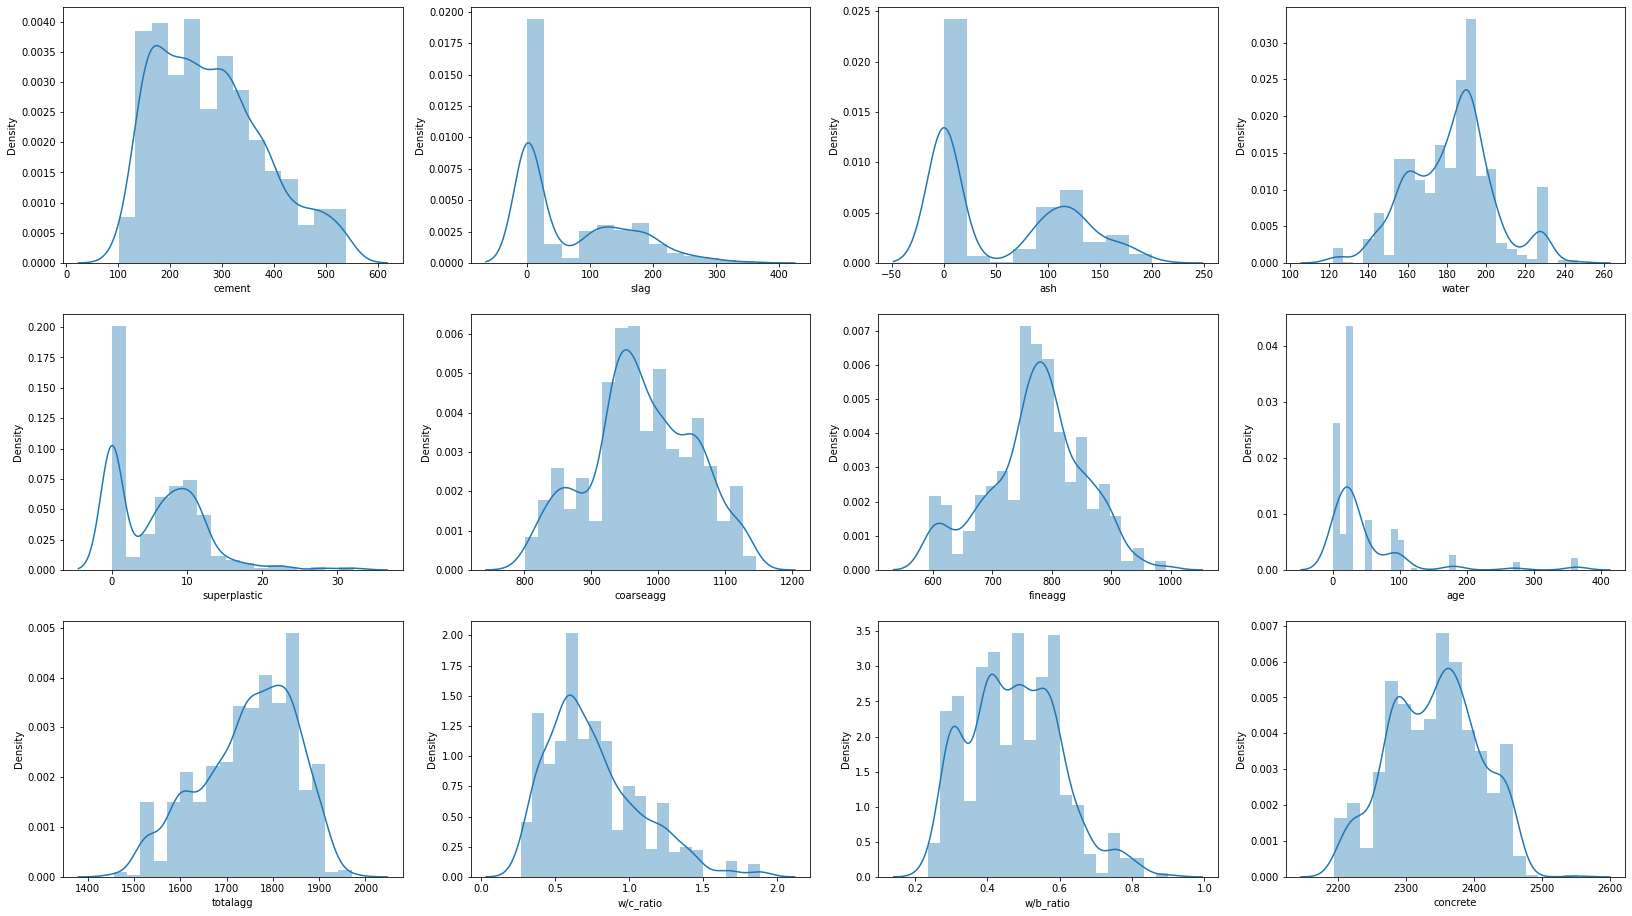

In [15]:
fig, ax = plt.subplots(3, 4, figsize=(28,16))
sns.distplot(df['cement'],ax=ax[0][0])
sns.distplot(df['slag'],ax=ax[0][1])
sns.distplot(df['ash'],ax=ax[0][2])
sns.distplot(df['water'],ax=ax[0][3])
sns.distplot(df['superplastic'],ax=ax[1][0])
sns.distplot(df['coarseagg'],ax=ax[1][1])
sns.distplot(df['fineagg'],ax=ax[1][2])
sns.distplot(df['age'],ax=ax[1][3])
sns.distplot(df['totalagg'],ax=ax[2][0])
sns.distplot(df['w/c_ratio'],ax=ax[2][1])
sns.distplot(df['w/b_ratio'],ax=ax[2][2])
sns.distplot(df['concrete'],ax=ax[2][3]);

**Observations :**
- cement is almost normal. 
- slag has  two gaussians and right skewed.
- ash has two gaussians and right skewed.
- water has three gaussians and slighly left skewed.
- superplastic has two gaussians and rightly skewed.
- coarseagg has three gaussians and almost normal.
- fineagg has almost two gaussians and looks like normal.
- age has multiple gaussians and rightly skewed.
- totalagg is slightly left skewed.
- w/c_ratio is right skewed.
- w/b_ratio has multiple gaussians and slightly right skewed.
- concrete has multiple gaussians.

Further, we can see the exact skewness values of the data using statistical functions.

In [16]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.cement),stats.skew(df.slag),stats.skew(df.ash)
                                       ,stats.skew(df.water),stats.skew(df.superplastic)
                                       ,stats.skew(df.coarseagg),stats.skew(df.fineagg),stats.skew(df.age),stats.skew(df['totalagg']),
                                       stats.skew(df['w/c_ratio']),stats.skew(df['w/b_ratio']),stats.skew(df.concrete)]}
                        ,index=['Cement','Blast','Fly Ash','Water', 'Superplasticizer'
                                , 'Coarse Aggregate', 'Fine Aggregate','Age','Total Aggregate','W/C Ratio','W/B Ratio','Concrete'])
Skewness

,Skewness
Cement,0.564115
Blast,0.853948
Fly Ash,0.496489
Water,0.034382
Superplasticizer,0.979140
Coarse Aggregate,-0.065159
Fine Aggregate,-0.251976
Age,3.249115
Total Aggregate,-0.475891
W/C Ratio,0.939065


Blast , Super Plasticizer , w/c ratio and Age are skewed more.If we want, we can transform these variables for better accuracy.

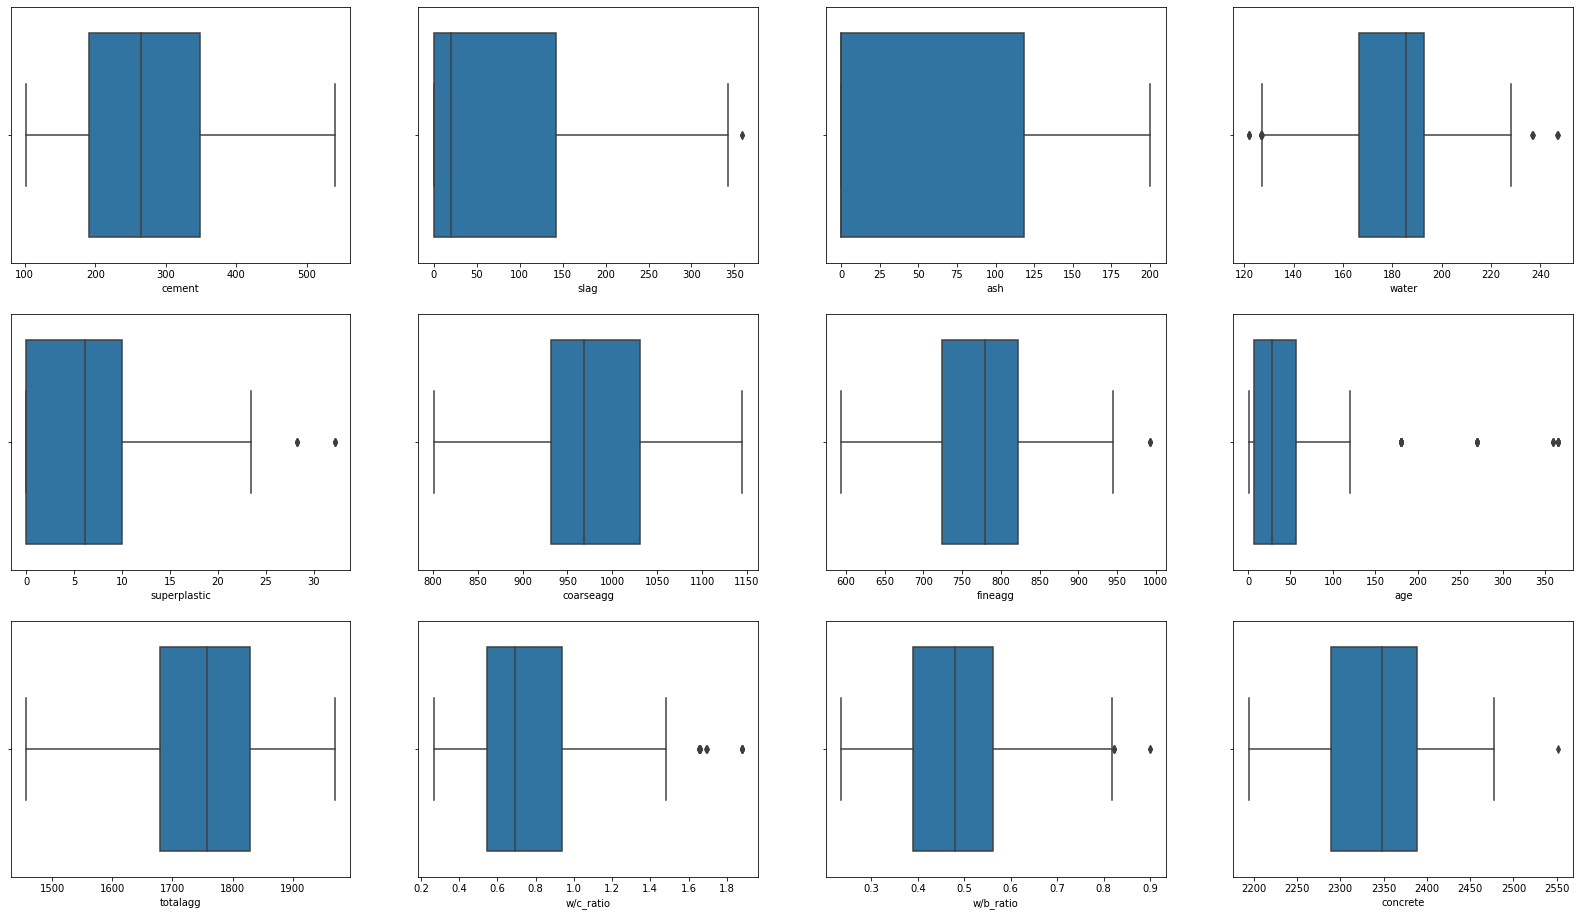

In [17]:
fig, ax = plt.subplots(3, 4, figsize=(28,16))
sns.boxplot(df['cement'],ax=ax[0][0])
sns.boxplot(df['slag'],ax=ax[0][1])
sns.boxplot(df['ash'],ax=ax[0][2])
sns.boxplot(df['water'],ax=ax[0][3])
sns.boxplot(df['superplastic'],ax=ax[1][0])
sns.boxplot(df['coarseagg'],ax=ax[1][1])
sns.boxplot(df['fineagg'],ax=ax[1][2])
sns.boxplot(df['age'],ax=ax[1][3])
sns.boxplot(df['totalagg'],ax=ax[2][0])
sns.boxplot(df['w/c_ratio'],ax=ax[2][1])
sns.boxplot(df['w/b_ratio'],ax=ax[2][2])
sns.boxplot(df['concrete'],ax=ax[2][3]);

**Observations :**
- Age column appears to be having maximum number of outliers.
- Water, superplasticizer and w/c_ratio have some outliers.

**Checking the pairwise relations of Features.**

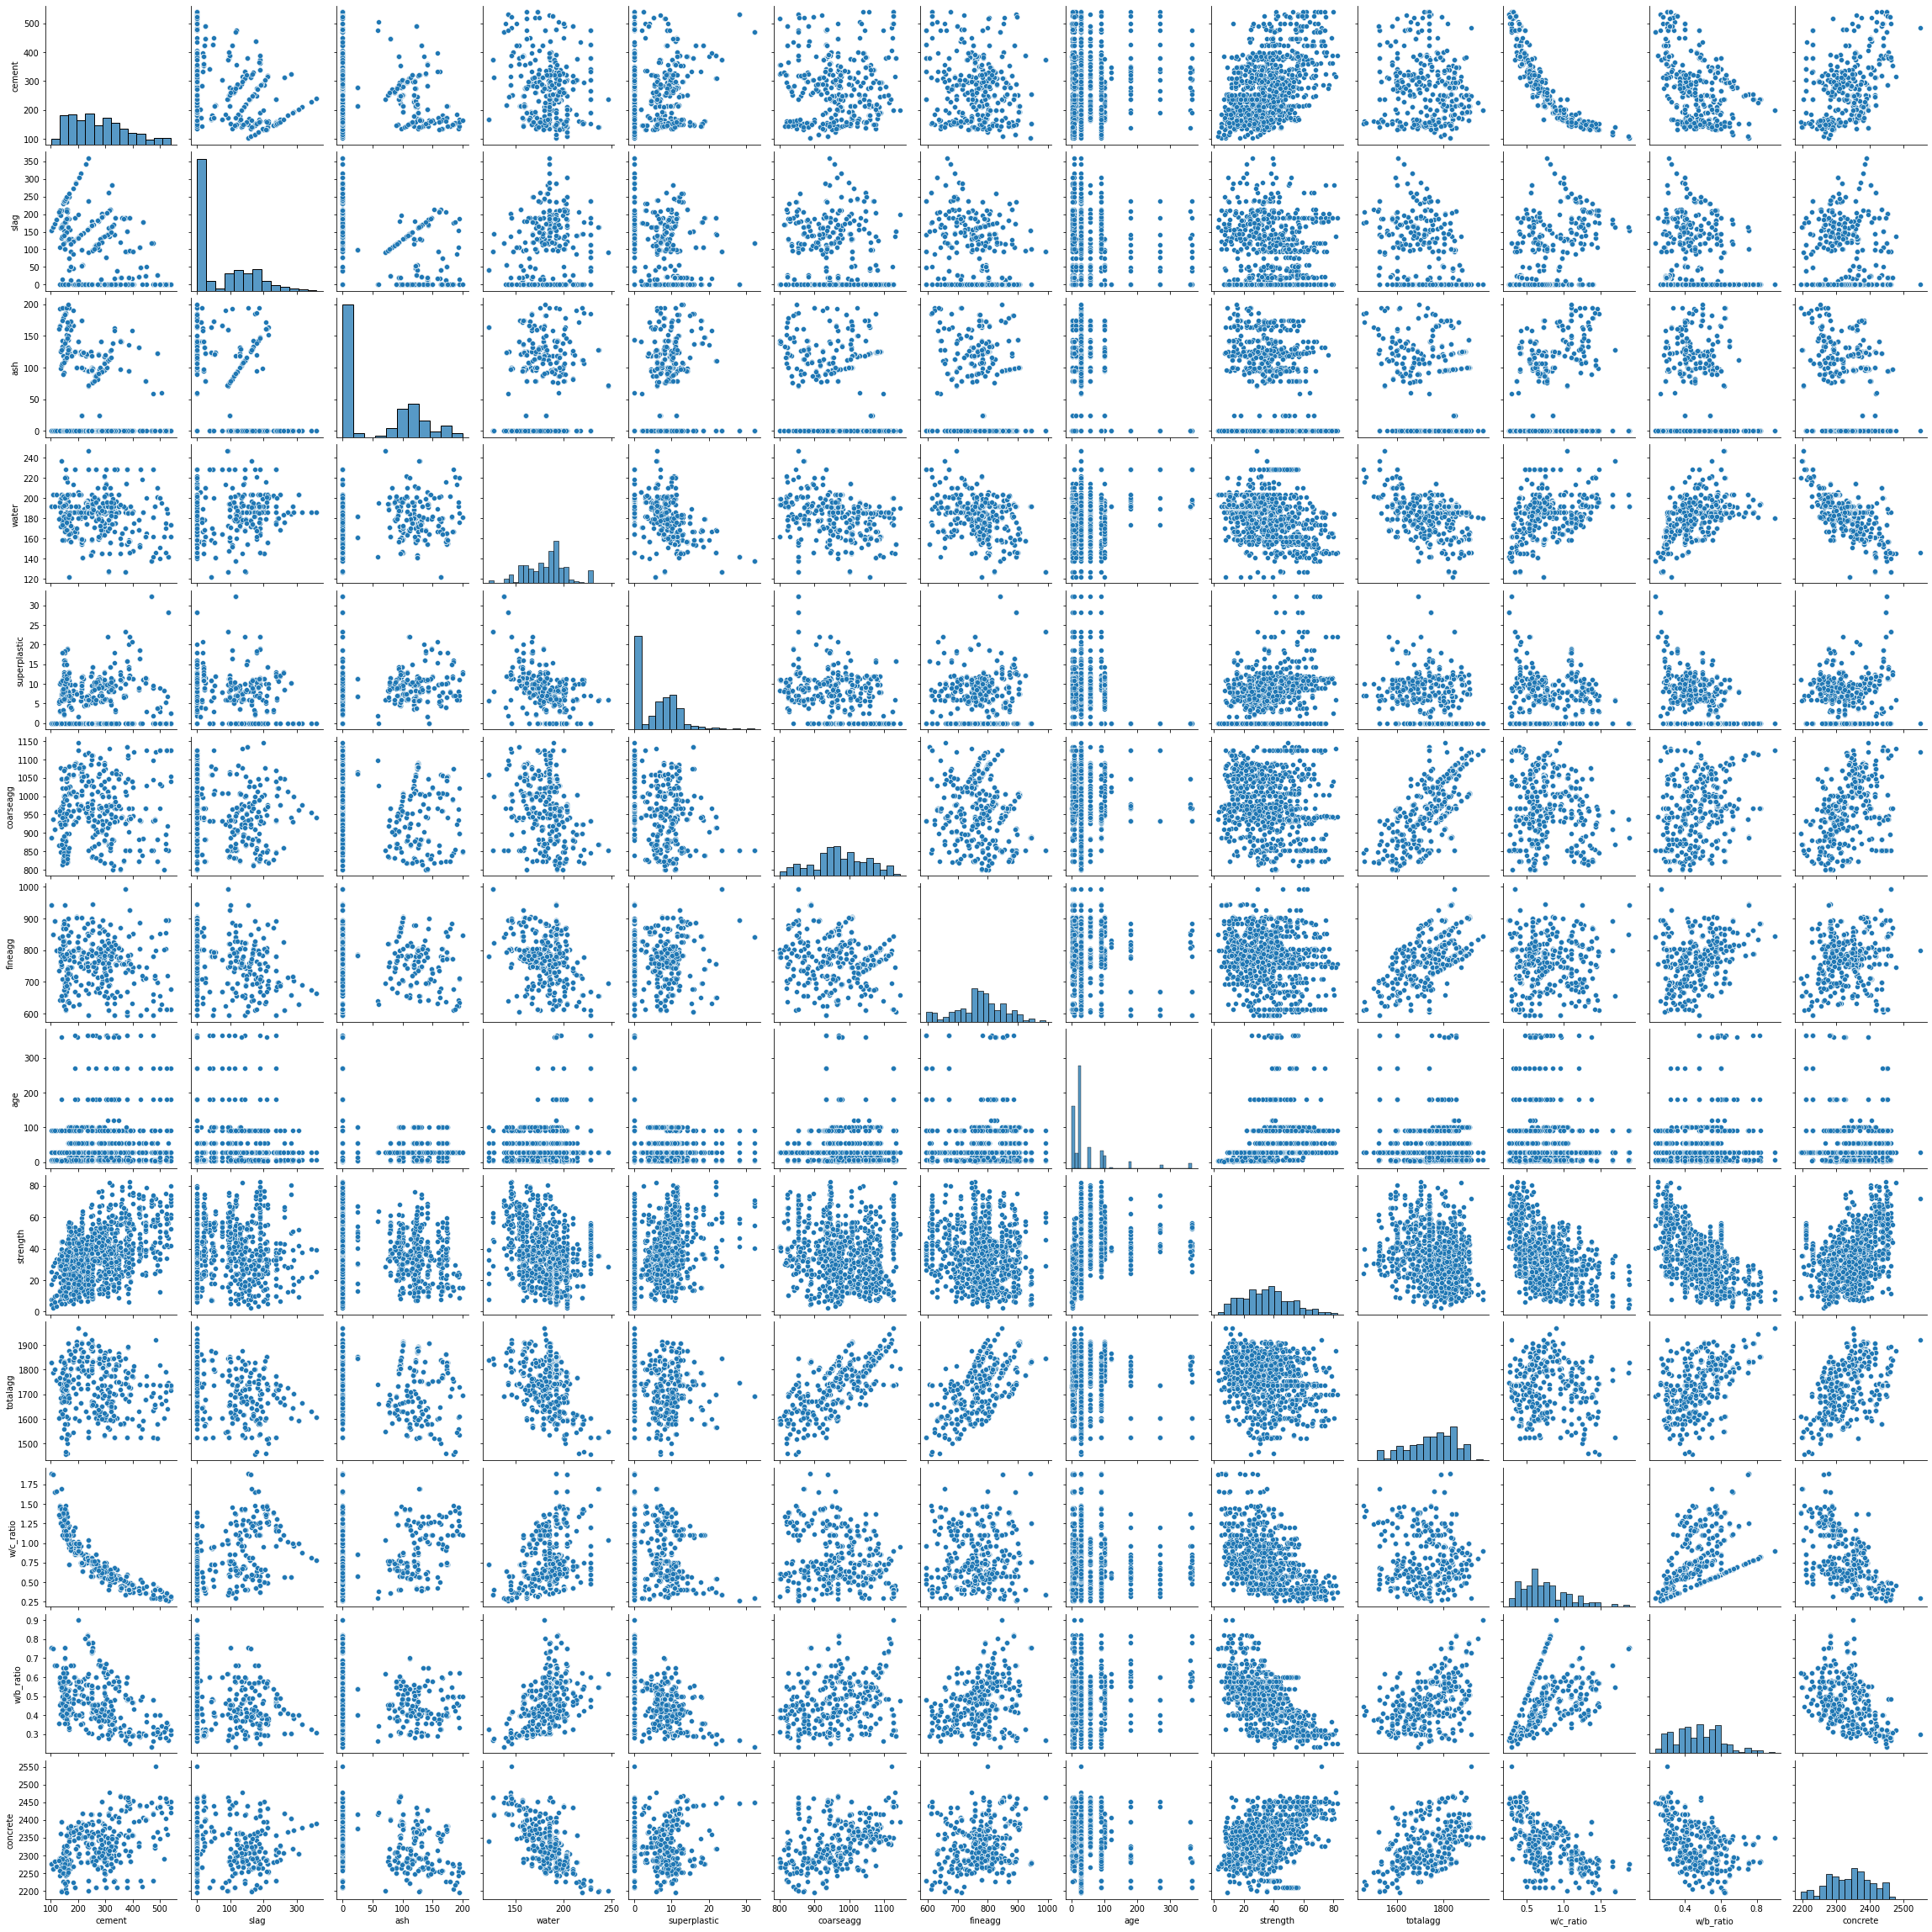

In [18]:
sns.pairplot(df)
plt.show()

**Observations:**

***Relationship between independent attributes:***

- cement and w/c_ratio have high correlation.
- water and concrete also have high correlation.
- fine aggregate and coarse aggregate are highly correlated to total aggregate.
- w/c_ratio and w/b_ratio are correlated.
- All the other independent variables are not much correlated. They are spread like a cloud.

The reason why we are doing all this analysis is if we find any kind of dimensions which are very strongly correlated i.e. r value close to 1 or -1 such dimensions are giving same information to your algorithms, its a redundant dimension. So in such cases we may want to keep one and drop the other which we should keep and which we should drop depends on again your domain expertise, which one of the dimension is more prone to errors.I would like to drop that dimension. Or we have a choice to combine these dimensions and create a composite dimension out of it.

***Strength attribute:***

- strength is linearly related to the cement. The relationship is positive and we can see that for a given value of cement we have a multiple values of strength. Which one should we pick we don't know. Hence Cement though it has positive relationship with the strength, it is not a very good predictor. It is a weak predictor.
- There is negative correlation between (strength & w/c_ratio) and (strength & w/b_ratio).
- strength is positively correlated with concrete
- Other attributes does not give any strong relationship with strength.
Hence, we can see that none of the independent attributes are a good predictors of the strength attribute. There is a no linear relationship between them.

Since there is no linear relationship between target and features, Linear Regression might not give good accuracy.

We can further check correlation between features by plotting the Pearson Correlation coefficients between the features. 

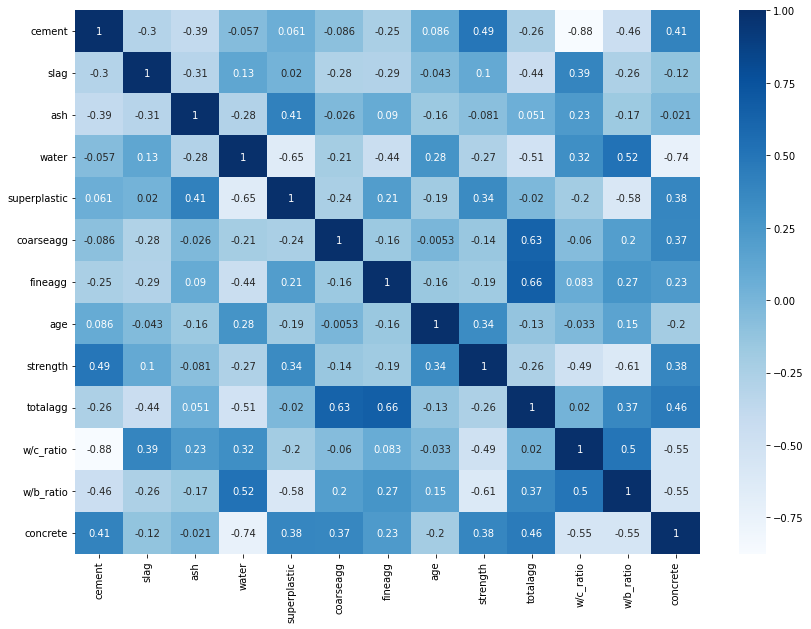

In [19]:
corr = df.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

**Observations :**
* ***Compressive strength*** is highly correlated with ***w/c_ratio*** , ***w/b_ratio*** , ***age*** , ***cement*** .
* ***Concrete*** and ***Super plasticizer*** are the other two features which are strongly correlated with ***Compressive Strength***.
* ***Cement*** has very high negative correlation with ***w/c_ratio***. we will drop w/c_ratio column.


# Data PreProcessing

In [20]:
df_ = df.copy()

In [21]:
df_.drop(columns=['w/c_ratio'],inplace=True)

In [22]:
X = df_.drop("strength",axis=1)
y = df_["strength"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Model Building


**Let us try different models**

Model = Linear Regression
RMSE =  11.071734465657315
r2_score =  0.5890946134951549




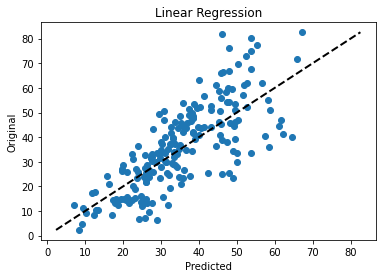

In [24]:
# Linear Regression

lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print("Model = Linear Regression") 
print("RMSE = ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("r2_score = ",r2_score(y_test, y_pred))
print("\n")

plt.scatter(y_pred, y_test) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("Original") 
plt.title("Linear Regression") 
plt.show()

Model = Ridge Regression
RMSE =  11.127486978115357
r2_score =  0.5849459071246211




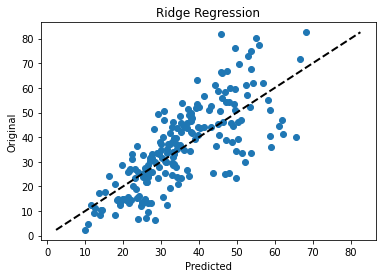

In [25]:
# Ridge Regression

rr = Ridge()
rr.fit(X_train,y_train)
y_pred = rr.predict(X_test)

print("Model = Ridge Regression") 
print("RMSE = ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("r2_score = ",r2_score(y_test, y_pred))
print("\n")

plt.scatter(y_pred, y_test) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("Original") 
plt.title("Ridge Regression") 
plt.show()

Model = Lasso Regression
RMSE =  11.184492490217322
r2_score =  0.5806824150064404




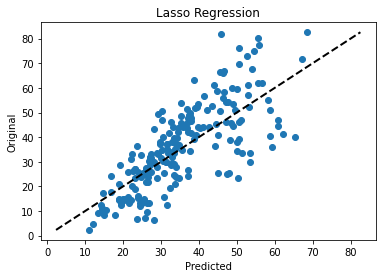

In [26]:
# Lasso Regression

ls=Lasso()
ls.fit(X_train,y_train)
y_pred = ls.predict(X_test)

print("Model = Lasso Regression") 
print("RMSE = ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("r2_score = ",r2_score(y_test, y_pred))
print("\n")

plt.scatter(y_pred, y_test) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("Original") 
plt.title("Lasso Regression") 
plt.show()

Model = SVR
RMSE =  16.57425937037179
r2_score =  0.07917145627462308




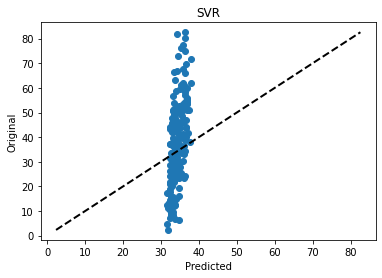

In [27]:
# SVR

svr = SVR()
svr.fit(X_train, y_train) 
y_pred = svr.predict(X_test) 

print("Model = SVR") 
print("RMSE = ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("r2_score = ",r2_score(y_test, y_pred))
print("\n")

plt.scatter(y_pred, y_test) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("Original") 
plt.title("SVR") 
plt.show()

Model = K Neighbors Regressor
RMSE =  10.12306410852335
r2_score =  0.6564938746080671




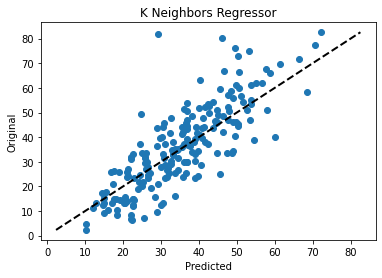

In [28]:
# K Neighbors Regressor

knr = KNeighborsRegressor()
knr.fit(X_train, y_train) 
y_pred = knr.predict(X_test) 

print("Model = K Neighbors Regressor") 
print("RMSE = ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("r2_score = ",r2_score(y_test, y_pred))
print("\n")

plt.scatter(y_pred, y_test) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("Original") 
plt.title("K Neighbors Regressor") 
plt.show()

Model = Decision Tree Regressor
RMSE =  5.275551290425528
r2_score =  0.9067076117842737




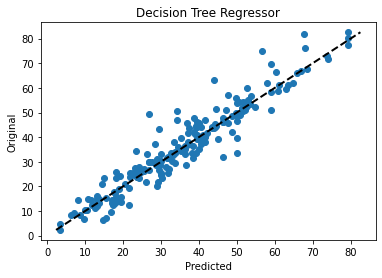

In [29]:
# Decision Tree

dtr = DecisionTreeRegressor() 
dtr.fit(X_train, y_train) 
y_pred = dtr.predict(X_test) 

print("Model = Decision Tree Regressor") 
print("RMSE = ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("r2_score = ",r2_score(y_test, y_pred))
print("\n")

plt.scatter(y_pred, y_test) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("Original") 
plt.title("Decision Tree Regressor") 
plt.show()

Model = Random Forest Regressor
RMSE =  4.947149436732071
r2_score =  0.917960960013781




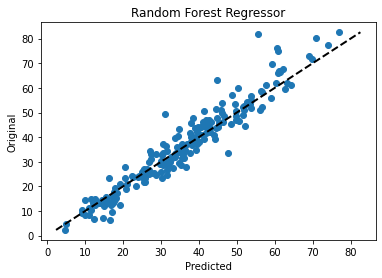

In [30]:
# Random Forest Regression

rfr = RandomForestRegressor(n_estimators=100,random_state=42) 
rfr.fit(X_train, y_train) 
y_pred = rfr.predict(X_test) 

print("Model = Random Forest Regressor") 
print("RMSE = ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("r2_score = ",r2_score(y_test, y_pred))
print("\n")

plt.scatter(y_pred, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("Original") 
plt.title("Random Forest Regressor") 
plt.show()

Model = Gradient Bossting Regressor
RMSE =  5.3580476544182964
r2_score =  0.9037670819136662




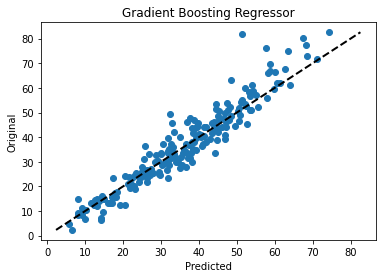

In [31]:
# Gradient Boosting Regressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train) 
y_pred = gbr.predict(X_test) 

print("Model = Gradient Bossting Regressor") 
print("RMSE = ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("r2_score = ",r2_score(y_test, y_pred))
print("\n")

plt.scatter(y_pred, y_test) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("Original") 
plt.title("Gradient Boosting Regressor") 
plt.show()

[13:54:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model = XGB Regressor
RMSE =  5.637889148849796
r2_score =  0.8934524233161137




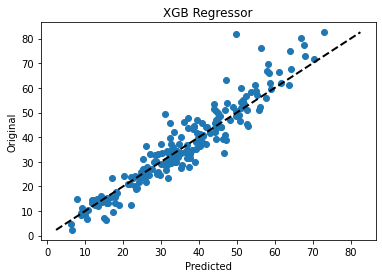

In [32]:
# XGB Regressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train) 
y_pred = xgb.predict(X_test) 

print("Model = XGB Regressor") 
print("RMSE = ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("r2_score = ",r2_score(y_test, y_pred))
print("\n")

plt.scatter(y_pred, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("Original") 
plt.title("XGB Regressor") 
plt.show()

Model = Bagging Regressor
RMSE =  5.024149573040499
r2_score =  0.9153872847704143




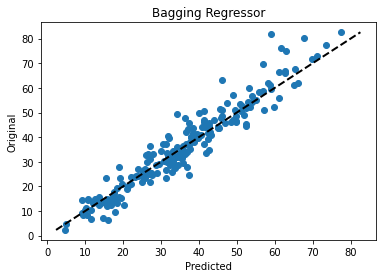

In [33]:
# Bagging Regressor

br = BaggingRegressor()
br.fit(X_train, y_train) 
y_pred = br.predict(X_test) 

print("Model = Bagging Regressor") 
print("RMSE = ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("r2_score = ",r2_score(y_test, y_pred))
print("\n")

plt.scatter(y_pred, y_test) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("Original") 
plt.title("Bagging Regressor") 
plt.show()

In [34]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

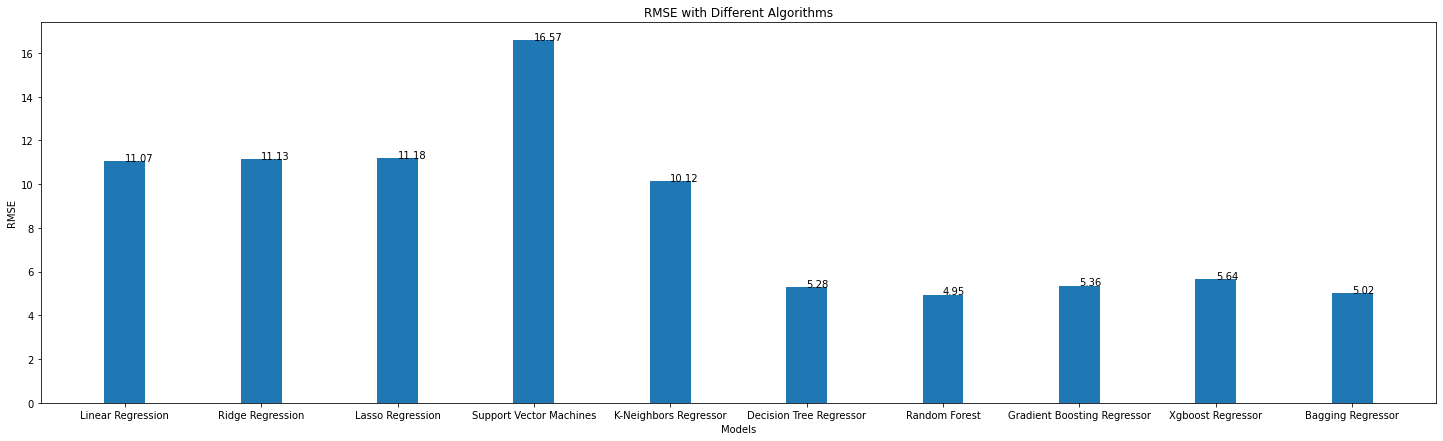

In [35]:
models = [lr, rr, ls, svr, knr, dtr, rfr, gbr, xgb, br] 
names = ["Linear Regression", "Ridge Regression", "Lasso Regression", "Support Vector Machines", "K-Neighbors Regressor", "Decision Tree Regressor", "Random Forest",
         "Gradient Boosting Regressor", "Xgboost Regressor", "Bagging Regressor"] 
rmses = [] 
for model in models: 
   rmses.append(round(np.sqrt(mean_squared_error(y_test, model.predict(X_test))),2)) 
x = np.arange(len(names)) 
width = 0.3 
fig, ax = plt.subplots(figsize=(25,7)) 
ax.bar(x, rmses, width) 
addlabels(x,rmses)
ax.set_ylabel('RMSE') 
ax.set_xlabel('Models') 
ax.set_title('RMSE with Different Algorithms') 
ax.set_xticks(x) 
ax.set_xticklabels(names) 
plt.show()

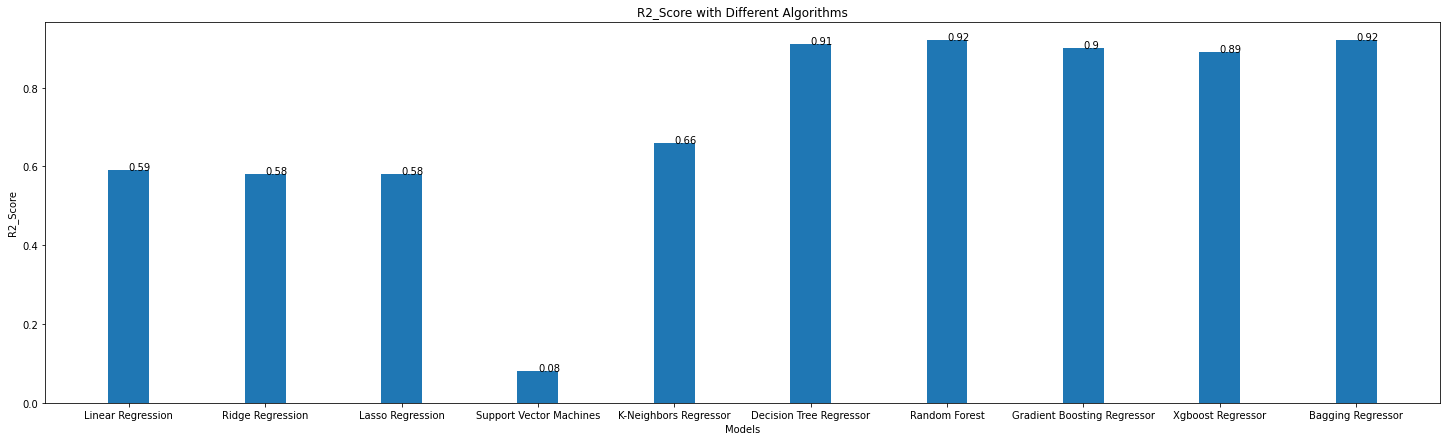

In [36]:
models = [lr, rr, ls, svr, knr, dtr, rfr, gbr, xgb, br] 
names = ["Linear Regression", "Ridge Regression", "Lasso Regression", "Support Vector Machines", "K-Neighbors Regressor", "Decision Tree Regressor", "Random Forest",
         "Gradient Boosting Regressor", "Xgboost Regressor", "Bagging Regressor"] 
r2_scores = [] 
for model in models: 
   r2_scores.append(round(r2_score(y_test, model.predict(X_test)),2)) 
x = np.arange(len(names)) 
width = 0.3 
fig, ax = plt.subplots(figsize=(25,7)) 
ax.bar(x, r2_scores, width) 
addlabels(x,r2_scores)
ax.set_ylabel('R2_Score') 
ax.set_xlabel('Models') 
ax.set_title('R2_Score with Different Algorithms') 
ax.set_xticks(x) 
ax.set_xticklabels(names) 
plt.show()

**Random Forest Regressor** is the best model since it has less rmse and high r2_score among all the models. We can further tune this model to improve r2_score.

In [37]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
cross_val_score(rfr, X, y, cv=cv)

array([0.91796096, 0.88981771, 0.91676453, 0.89371877, 0.88044016])

In [38]:
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

target = pd.DataFrame(columns = ['Original','Predicted_rfr'])
target['Original'] = y_test
target['Predicted_rfr'] = y_pred_rfr

In [39]:
target

,Original,Predicted_rfr
951,19.01,20.7618
654,24.29,24.2407
706,26.32,25.2393
538,34.57,27.0645
389,44.13,41.9004
...,...,...
232,50.77,41.4477
802,31.65,32.9244
358,66.95,61.1717
234,13.18,16.3337


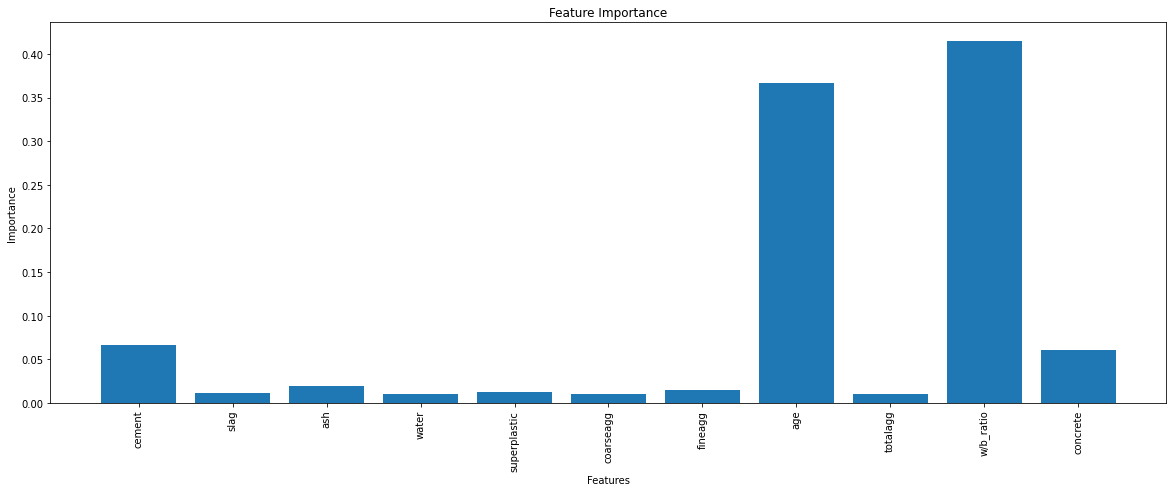

In [40]:
feature_rfr = rfr.feature_importances_ 

labels = (df_.drop("strength", axis=1)).columns.to_list()
x = np.arange(len(labels)) 

plt.figure(figsize = (20,7))
plt.bar(x, feature_rfr)
plt.ylabel('Importance') 
plt.xlabel('Features') 
plt.title('Feature Importance') 
plt.xticks(x,labels, rotation = 90) 
plt.show()

In [41]:
def Grid_Search_CV_RFR(X_train, y_train):
  estimator = RandomForestRegressor()
  param_grid = { 
            "n_estimators"      : [50,100,200,500],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

  grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)
  grid.fit(X_train, y_train)
  return grid.best_score_ , grid.best_params_

Grid_Search_CV_RFR(X_train,y_train)

(0.9069933856390093,
 {'bootstrap': True,
  'max_features': 'auto',
  'min_samples_split': 2,
  'n_estimators': 50})

In [42]:
best_params = {'bootstrap': False,
  'max_features': 'sqrt',
  'min_samples_split': 2,
  'n_estimators': 500}

In [43]:
def RFR(X_train, X_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    print("R2 score:",r2_score(y_test,y_predict))

RFR(X_train, X_test, y_train, y_test,best_params)

R2 score: 0.9250714153781031


# Saving Model

In [44]:
rfr = RandomForestRegressor(n_jobs=-1).set_params(**best_params) 
rfr.fit(X,y)

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=500,
                      n_jobs=-1)

In [45]:
num_features = [540.0	, 0.0	, 0.0	, 162.0 ,	2.5 ,	1040.0 ,	676.0 ,	28]

total_agg = num_features[5] + num_features[6]
wc_ratio = num_features[3] / num_features[0]
wb_ratio = num_features[3] / ( num_features[0] + num_features[1] + num_features[2] )
concrete = num_features[0] + num_features[1] + num_features[2] + num_features[3] + num_features[4] + num_features[5] + num_features[6]


num_features.append(total_agg)
num_features.append(wc_ratio)
num_features.append(wb_ratio)
num_features.append(concrete)

num_features.remove(num_features[9])

final_features = [np.array(num_features)]

rfr.predict(final_features)

array([79.99])

In [46]:
import pickle
with open('model.pkl','wb') as f:
  pickle.dump(rfr,f)

In [47]:
import json
columns =  {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
  f.write(json.dumps(columns))